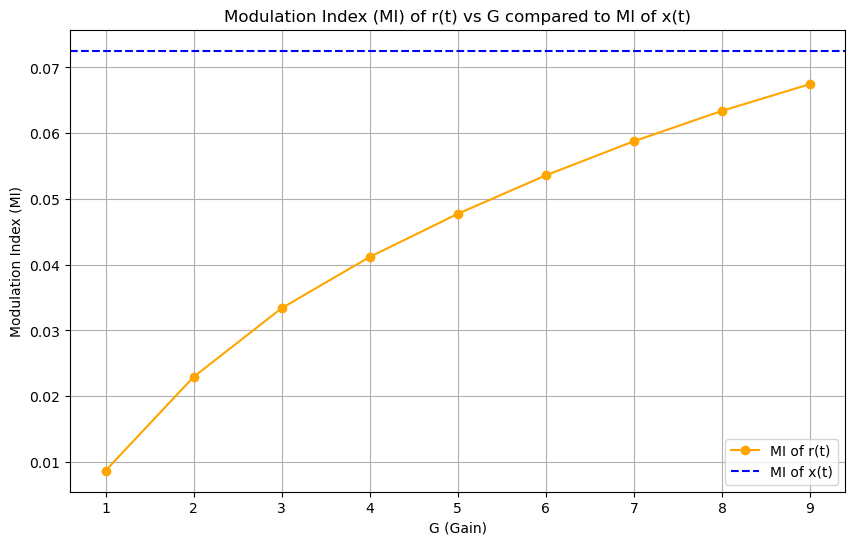

In [4]:
import numpy as np
import scipy.signal as signal
from scipy.stats import entropy
import matplotlib.pyplot as plt

# Function to calculate phase-amplitude coupling (Modulation Index) using Tort method
def modulation_index(low_freq_signal, high_freq_signal, num_bins=18):
    # Extract phase of the low-frequency signal
    low_freq_phase = np.angle(signal.hilbert(low_freq_signal))
    
    # Extract amplitude envelope of the high-frequency signal
    high_freq_amplitude = np.abs(signal.hilbert(high_freq_signal))
    
    # Bin the phase data
    phase_bins = np.linspace(-np.pi, np.pi, num_bins + 1)
    amplitude_means = np.zeros(num_bins)
    
    # Average high-frequency amplitude in each phase bin
    for i in range(num_bins):
        indices = np.where((low_freq_phase >= phase_bins[i]) & (low_freq_phase < phase_bins[i + 1]))[0]
        amplitude_means[i] = np.mean(high_freq_amplitude[indices])
    
    # Normalize amplitude means to create a probability distribution
    amplitude_means /= np.sum(amplitude_means)
    
    # Calculate modulation index as the Kullback-Leibler divergence between uniform and observed distributions
    uniform_dist = np.ones(num_bins) / num_bins
    mi = entropy(amplitude_means, uniform_dist)
    
    return mi

# Parameters
G_values = [1, 2, 3,4, 5, 6, 7, 8, 9]  # Different G values to test
B = 1.0
A1, A2, A3 = 0.9, 0.6, 0.3       # Amplitudes for the components
omega1, omega2, omega3 = 40.0, 60.0, 5.0  # Frequencies for the components
t = np.linspace(0, 10, 1000)  # Time array

# Input signal x(t) as a combination of 2 high frequencies and 1 low frequency
x_t = A1 * np.sin(omega1 * t) + A2 * np.sin(omega2 * t) + A3 * np.sin(omega3 * t)

# Low-frequency component (for PAC analysis)
low_freq_component = A3 * np.sin(omega3 * t)
high_freq_component_combined = A1 * np.sin(omega1 * t) + A2 * np.sin(omega2 * t)

# Calculate Modulation Index for the input signal x(t)
mi_x_t = modulation_index(low_freq_component, high_freq_component_combined)

# Calculate Modulation Index for r(t) with different G values
mi_r_t_values = []

for G_test in G_values:
    r_t_test = 1 / (1 + np.exp(-(G_test * x_t + B)))
    mi_r_t = modulation_index(low_freq_component, r_t_test)
    mi_r_t_values.append(mi_r_t)

# Plotting the Modulation Index (MI) for r(t) with different G values
plt.figure(figsize=(10, 6))
plt.plot(G_values, mi_r_t_values, marker='o', linestyle='-', color='orange', label='MI of r(t)')
plt.axhline(y=mi_x_t, color='blue', linestyle='--', label='MI of x(t)')
plt.title('Modulation Index (MI) of r(t) vs G compared to MI of x(t)')
plt.xlabel('G (Gain)')
plt.ylabel('Modulation Index (MI)')
plt.legend()
plt.grid(True)

# Save the plot with high resolution
plt.savefig('/Users/ali/Desktop/modulation_index_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with 300 DPI
# plt.savefig('modulation_index_plot.pdf', dpi=300, bbox_inches='tight')  # Save as PDF with 300 DPI

# Show the plot
plt.show()


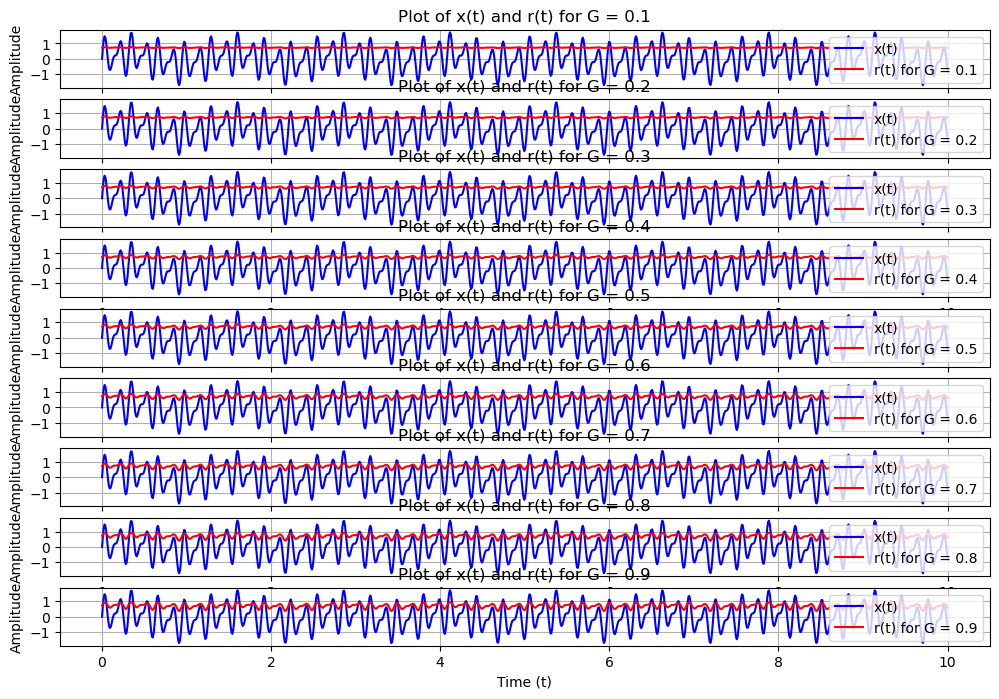

In [5]:
# Plot x(t) and r(t) for G = 0.2 and G = 0.8
G_plot_values = [x * 0.1 for x in G_values]

plt.figure(figsize=(12, 8))

for i, G in enumerate(G_plot_values):
    r_t = 1 / (1 + np.exp(-(G * x_t + B)))
    
    plt.subplot(len(G_plot_values), 1, i + 1)
    plt.plot(t, x_t, label='x(t)', color='blue')
    plt.plot(t, r_t, label=f'r(t) for G = {round(G,2)}', color='red')
    plt.title(f'Plot of x(t) and r(t) for G = {round(G,2)}')
    plt.xlabel('Time (t)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

# Save the plots
plt.savefig('/Users/ali/Desktop/xt_rt_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with 300 DPI
#plt.savefig('xt_rt_plot.pdf', dpi=300, bbox_inches='tight')  # Save as PDF with 300 DPI

plt.show()


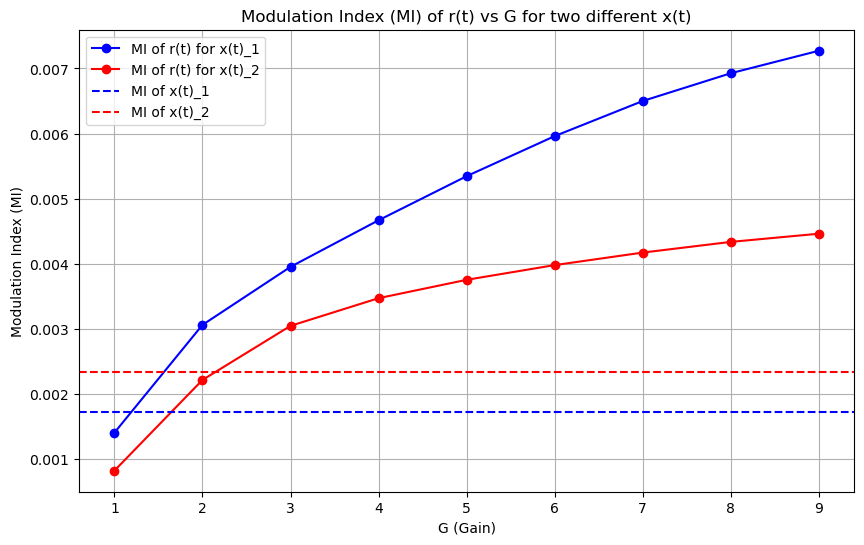

In [29]:
import numpy as np
import scipy.signal as signal
from scipy.stats import entropy
import matplotlib.pyplot as plt

# Function to calculate phase-amplitude coupling (Modulation Index) using Tort method
def modulation_index(low_freq_signal, high_freq_signal, num_bins=18):
    low_freq_phase = np.angle(signal.hilbert(low_freq_signal))
    high_freq_amplitude = np.abs(signal.hilbert(high_freq_signal))
    
    phase_bins = np.linspace(-np.pi, np.pi, num_bins + 1)
    amplitude_means = np.zeros(num_bins)
    
    for i in range(num_bins):
        indices = np.where((low_freq_phase >= phase_bins[i]) & (low_freq_phase < phase_bins[i + 1]))[0]
        amplitude_means[i] = np.mean(high_freq_amplitude[indices])
    
    amplitude_means /= np.sum(amplitude_means)
    
    uniform_dist = np.ones(num_bins) / num_bins
    mi = entropy(amplitude_means, uniform_dist)
    
    return mi

# Parameters
G_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Different G values to test
B = 1.0
t = np.linspace(0, 10, 1000)  # Time array

# First x(t) signal (similar to original)
A1_1, A2_1, A3_1 = 0.9, 0.6, 0.3       # Amplitudes for the components
omega1_1, omega2_1, omega3_1 = 40.0, 60.0, 5.3  # Frequencies for the components
x_t_1 = A1_1 * np.sin(omega1_1 * t) + A2_1 * np.sin(omega2_1 * t) + A3_1 * np.sin(omega3_1 * t)

# Second x(t) signal with different frequencies and amplitudes
A1_2, A2_2, A3_2 = 0.7, 0.5, 0.2
omega1_2, omega2_2, omega3_2 = 43.0, 64.0, 6.0
x_t_2 = A1_2 * np.sin(omega1_2 * t) + A2_2 * np.sin(omega2_2 * t) + A3_2 * np.sin(omega3_2 * t)

# Low-frequency components (for PAC analysis)
low_freq_component_1 = A3_1 * np.sin(omega3_1 * t)
high_freq_component_combined_1 = A1_1 * np.sin(omega1_1 * t) + A2_1 * np.sin(omega2_1 * t)

low_freq_component_2 = A3_2 * np.sin(omega3_2 * t)
high_freq_component_combined_2 = A1_2 * np.sin(omega1_2 * t) + A2_2 * np.sin(omega2_2 * t)

# Calculate Modulation Index for both x(t) signals
mi_x_t_1 = modulation_index(low_freq_component_1, high_freq_component_combined_1)
mi_x_t_2 = modulation_index(low_freq_component_2, high_freq_component_combined_2)

# Calculate Modulation Index for r(t) with different G values for both x(t) signals
mi_r_t_values_1 = []
mi_r_t_values_2 = []

for G_test in G_values:
    # r(t) for x_t_1
    r_t_test_1 = 1 / (1 + np.exp(-(G_test * x_t_1 + B)))
    mi_r_t_1 = modulation_index(low_freq_component_1, r_t_test_1)
    mi_r_t_values_1.append(mi_r_t_1)
    
    # r(t) for x_t_2
    r_t_test_2 = 1 / (1 + np.exp(-(G_test * x_t_2 + B)))
    mi_r_t_2 = modulation_index(low_freq_component_2, r_t_test_2)
    mi_r_t_values_2.append(mi_r_t_2)

# Plotting the Modulation Index (MI) for r(t) with different G values for both signals
plt.figure(figsize=(10, 6))
plt.plot(G_values, mi_r_t_values_1, marker='o', linestyle='-', color='blue', label='MI of r(t) for x(t)_1')
plt.plot(G_values, mi_r_t_values_2, marker='o', linestyle='-', color='red', label='MI of r(t) for x(t)_2')
plt.axhline(y=mi_x_t_1, color='blue', linestyle='--', label='MI of x(t)_1')
plt.axhline(y=mi_x_t_2, color='red', linestyle='--', label='MI of x(t)_2')
plt.title('Modulation Index (MI) of r(t) vs G for two different x(t)')
plt.xlabel('G (Gain)')
plt.ylabel('Modulation Index (MI)')
plt.legend()
plt.grid(True)

# Save the plot with high resolution
plt.savefig('/Users/ali/Desktop/modulation_index_plot_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


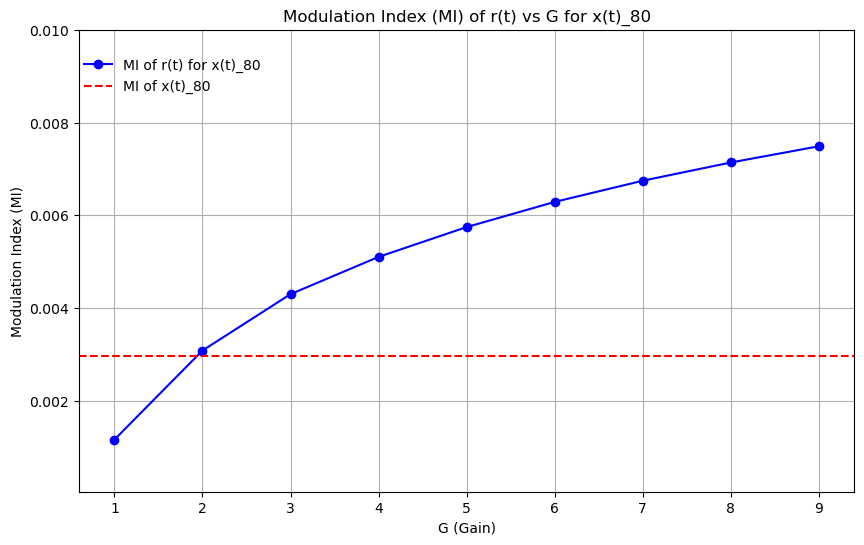

In [20]:
import numpy as np
import scipy.signal as signal
from scipy.stats import entropy
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter, FuncAnimation

# Function to calculate phase-amplitude coupling (Modulation Index) using Tort method
def modulation_index(low_freq_signal, high_freq_signal, num_bins=18):
    low_freq_phase = np.angle(signal.hilbert(low_freq_signal))
    high_freq_amplitude = np.abs(signal.hilbert(high_freq_signal))
    
    phase_bins = np.linspace(-np.pi, np.pi, num_bins + 1)
    amplitude_means = np.zeros(num_bins)
    
    for i in range(num_bins):
        indices = np.where((low_freq_phase >= phase_bins[i]) & (low_freq_phase < phase_bins[i + 1]))[0]
        amplitude_means[i] = np.mean(high_freq_amplitude[indices])
    
    amplitude_means /= np.sum(amplitude_means)
    
    uniform_dist = np.ones(num_bins) / num_bins
    mi = entropy(amplitude_means, uniform_dist)
    
    return mi

# Function to generate signal x_t with given amplitudes and frequencies
def generate_signal(A1, A2, A3, omega1, omega2, omega3, t):
    return A1 * np.sin(omega1 * t) + A2 * np.sin(omega2 * t) + A3 * np.sin(omega3 * t)

# Parameters
G_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Different G values to test
B = 1.0
t = np.linspace(0, 10, 1000)  # Time array

# Generate 100 different x_t signals by smoothly varying the parameters
A_values = [(0.9 - 0.005 * i, 0.6 - 0.003 * i, 0.3 - 0.001 * i) for i in range(100)]
omega_values = [(40.0 + 0.1 * i, 60.0 + 0.05 * i, 5.3 + 0.01 * i) for i in range(100)]

# Storage for Modulation Index values for r(t)
mi_r_t_values_all = []

# Calculate Modulation Index for each x_t signal and r_t
for i in range(100):
    A1, A2, A3 = A_values[i]
    omega1, omega2, omega3 = omega_values[i]
    
    x_t = generate_signal(A1, A2, A3, omega1, omega2, omega3, t)
    
    # Low-frequency component and high-frequency component combined
    low_freq_component = A3 * np.sin(omega3 * t)
    high_freq_component_combined = A1 * np.sin(omega1 * t) + A2 * np.sin(omega2 * t)
    
    # Calculate MI for x(t)
    mi_x_t = modulation_index(low_freq_component, high_freq_component_combined)
    
    # Calculate MI for r(t) with different G values
    mi_r_t_values = []
    
    for G_test in G_values:
        r_t_test = 1 / (1 + np.exp(-(G_test * x_t + B)))
        mi_r_t = modulation_index(low_freq_component, r_t_test)
        mi_r_t_values.append(mi_r_t)
    
    mi_r_t_values_all.append((mi_x_t, mi_r_t_values))

# Sort the mi_r_t_values_all by ascending mi_x_t
mi_r_t_values_all_sorted = sorted(mi_r_t_values_all, key=lambda x: x[0])

# Calculate the global y-axis limits for consistent scaling across frames
all_mi_values = [mi_x_t for mi_x_t, _ in mi_r_t_values_all_sorted] + [mi for _, mi_r_t_values in mi_r_t_values_all_sorted for mi in mi_r_t_values]
y_min, y_max = min(all_mi_values), max(all_mi_values)

# Create the animation
fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    ax.clear()
    
    # Determine which of the sorted 100 plots to display
    mi_x_t, mi_r_t_values = mi_r_t_values_all_sorted[frame]
    
    # Plot the results
    ax.plot(G_values, mi_r_t_values, marker='o', linestyle='-', color='blue', label=f'MI of r(t) for x(t)_{frame+1}')
    ax.axhline(y=mi_x_t, color='red', linestyle='--', label=f'MI of x(t)_{frame+1}')
    
    ax.set_title(f'Modulation Index (MI) of r(t) vs G for x(t)_{frame+1}')
    ax.set_xlabel('G (Gain)')
    ax.set_ylabel('Modulation Index (MI)')
    ax.set_ylim([y_min, 0.01])  # Set consistent y-axis limits
    ax.legend()
    ax.grid(True)
    ax.legend(loc='center left', bbox_to_anchor=(-0.01, 0.9), frameon=False)

# Create an animation where each frame is for a different x_t signal
ani = FuncAnimation(fig, update, frames=80, repeat=False)

# Specify the Pillow writer for saving as GIF
pillow_writer = PillowWriter(fps=8)

# Save the animation as a GIF file
ani.save('/Users/ali/Desktop/modulation_index_movie.gif', writer=pillow_writer, dpi=300)

plt.show()
